# Prashant Anand Ranjan
# 21105066
---
## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Plot function

In [2]:
def plots(H, Q, U, m, P, T, Label='NONE'):
    plt.figure(figsize=(15, 15)) 
    
    plt.subplot(3, 2, 1, xlabel = 'Time(s)', ylabel = 'Enthalpy(KJ)')
    plt.plot(H)
    plt.grid()

    plt.subplot(3, 2, 3, xlabel = 'Time(s)', ylabel = 'Heat Trasfer(KJ)')
    plt.plot(Q)
    plt.grid()

    plt.subplot(3, 2, 5, xlabel = 'Time(s)', ylabel = 'Internal Energy(KJ)')
    plt.plot(U)
    plt.grid()

    plt.subplot(3, 2, 2, xlabel = 'Time(s)', ylabel = 'Mass(kg)')
    plt.plot(m)
    plt.grid()

    plt.subplot(3, 2, 4, xlabel = 'Time(s)', ylabel = 'Pressure(Pa)')
    plt.plot(P)
    plt.grid()

    plt.subplot(3, 2, 6, xlabel = 'Time(s)', ylabel = 'Temperature(K)')
    plt.plot(T);
    plt.grid()  
    plt.suptitle(Label)
    

## Main body
"Here Property# used for different cases"

In [3]:
m_0 = 0.5
m_in = 2.5e-4
m_out = 2e-4
m_hyd = 2.0159e-3
v = .1508
T_in = 300
T_out = 300
T_0 = 300
T_f = 300
af = 24e-3
As = .175929
cp = 14.615
cv = 10.316
R = 8.314
Γ = cp / cv
H_in = m_in * cp * T_in
H_out  = -m_out * cp * T_out
m = []
H = {'H1':[], 'H2':[], 'H3':[]}
Q = {'Q1':[], 'Q2':[], 'Q3':[]}
U = {'U1':[], 'U2':[], 'U3':[]}
T = {'T1':[], 'T2':[], 'T3':[]}
P = {'P1':[], 'P2':[], 'P3':[]}

for t in range(8000):
    if t <= 2000:
        m.append(m_0 + m_in * t)
        
        α = (af * As) / (cv * m_in)
        T_star = (Γ * T_f + α * T_f) / (1 + α)
        T_star_var = (α * T_f) / (1 + α - Γ)
        t_star = m[0] / m_in
        τ = (t - 0) / t_star
        
        T['T1'].append(T_star - (T_star - T_0) * (1 / (1 + τ))**(1 + α))
        Q['Q1'].append(af * As * (T_f - T['T1'][t]))
        H['H1'].append(H_in)
        U['U1'].append(H['H1'][t] + Q['Q1'][t])
        P['P1'].append(m[t] * R * T['T1'][t] / (m_hyd * v))
        
        T['T2'].append(T_star_var - (T_star_var - T_0) * (1 / (1 + τ))**(1 + α - Γ))
        Q['Q2'].append(af * As * (T_f - T['T2'][t]))
        H['H2'].append(m_in * cp * T['T2'][t])
        U['U2'].append(H['H2'][t] + Q['Q2'][t])
        P['P2'].append(m[t] * R * T['T2'][t] / (m_hyd * v))
        
        T['T3'].append(T_star - (T_star - T_0) * (1 / (1 + τ))**(1 + α))
        Q['Q3'].append(af * As * (T_f - T['T3'][t]))
        H['H3'].append(m_in * cp * T_0)
        U['U3'].append(H['H3'][t] + Q['Q3'][t])
        P['P3'].append(m[t] * R * T['T3'][t] / (m_hyd * v))
        
    elif t <= 4000:
        m.append(m[2000])
        
        T_star = T_f
        T_star_var = T_f
        t_star = m[2000] * cv / (af * As)
        τ = (t - 2000) / t_star
        
        T['T1'].append(T_star - (T_star - T['T1'][2000]) * np.exp(-τ))
        Q['Q1'].append(af * As * (T_f - T['T1'][t]))
        H['H1'].append(0)
        U['U1'].append(H['H1'][t] + Q['Q1'][t])
        P['P1'].append(m[t] * R * T['T1'][t] / (m_hyd * v))
        
        T['T2'].append(T_star_var - (T_star_var - T['T2'][2000]) * np.exp(-τ))
        Q['Q2'].append(af * As * (T_f - T['T2'][t]))
        H['H2'].append(0)
        U['U2'].append(H['H2'][t] + Q['Q2'][t])
        P['P2'].append(m[t] * R * T['T2'][t] / (m_hyd * v))
        
        T['T3'].append(T_star - (T_star - T['T3'][2000]) * np.exp(-τ))
        Q['Q3'].append(af * As * (T_f - T['T3'][t]))
        H['H3'].append(0)
        U['U3'].append(H['H3'][t] + Q['Q3'][t])
        P['P3'].append(m[t] * R * T['T3'][t] / (m_hyd * v))
        
    elif t <= 6000:
        m.append(m[4000]-(m_out * (t-4000)))
        
        α = (af * As) / (cv * -m_out)
        T_star = (Γ * T_f + α * T_f) / (1 + α)
        T_star_var = (α * T_f) / (1 + α - Γ)
        t_star = m[4000] / -m_out
        τ = (t - 4000) / t_star
        
        T['T1'].append(T_star - (T_star - T['T1'][4000]) * (1 / (1 + τ))**(1 + α))
        Q['Q1'].append(af * As * (T_f - T['T1'][t]))
        H['H1'].append(H_out)
        U['U1'].append(H['H1'][t] + Q['Q1'][t])
        P['P1'].append(m[t] * R * T['T1'][t] / (m_hyd * v))
        
        T['T2'].append(T_star_var - (T_star_var - T['T2'][4000]) * (1 / (1 + τ))**(1 + α - Γ))
        Q['Q2'].append(af * As * (T_f - T['T2'][t]))
        H['H2'].append(-m_out * cp * T['T2'][t])
        U['U2'].append(H['H2'][t] + Q['Q2'][t])
        P['P2'].append(m[t] * R * T['T2'][t] / (m_hyd * v))
        
        T['T3'].append(T_star_var - (T_star_var - T['T3'][4000]) * (1 / (1 + τ))**(1 + α - Γ))
        Q['Q3'].append(af * As * (T_f - T['T3'][t]))
        H['H3'].append(-m_out * cp * T['T3'][t])
        U['U3'].append(H['H3'][t] + Q['Q3'][t])
        P['P3'].append(m[t] * R * T['T3'][t] / (m_hyd * v))
        
    else:
        m.append(m[6000])
        
        T_star = T_f
        T_star_var = T_f
        t_star = m[6000] * cv / (af * As)
        τ = (t - 6000) / t_star
        
        T['T1'].append(T_star - (T_star - T['T1'][6000]) * np.exp(-τ))
        Q['Q1'].append(af * As * (T_f - T['T1'][t]))
        H['H1'].append(0)
        U['U1'].append(H['H1'][t] + Q['Q1'][t])
        P['P1'].append(m[t] * R * T['T1'][t] / (m_hyd * v))
        
        T['T2'].append(T_star_var - (T_star_var - T['T2'][6000]) * np.exp(-τ))
        Q['Q2'].append(af * As * (T_f - T['T2'][t]))
        H['H2'].append(0)
        U['U2'].append(H['H2'][t] + Q['Q2'][t])
        P['P2'].append(m[t] * R * T['T2'][t] / (m_hyd * v))
        
        T['T3'].append(T_star - (T_star - T['T3'][6000]) * np.exp(-τ))
        Q['Q3'].append(af * As * (T_f - T['T3'][t]))
        H['H3'].append(0)
        U['U3'].append(H['H3'][t] + Q['Q3'][t])
        P['P3'].append(m[t] * R * T['T3'][t] / (m_hyd * v))

## Plotting for 1st case

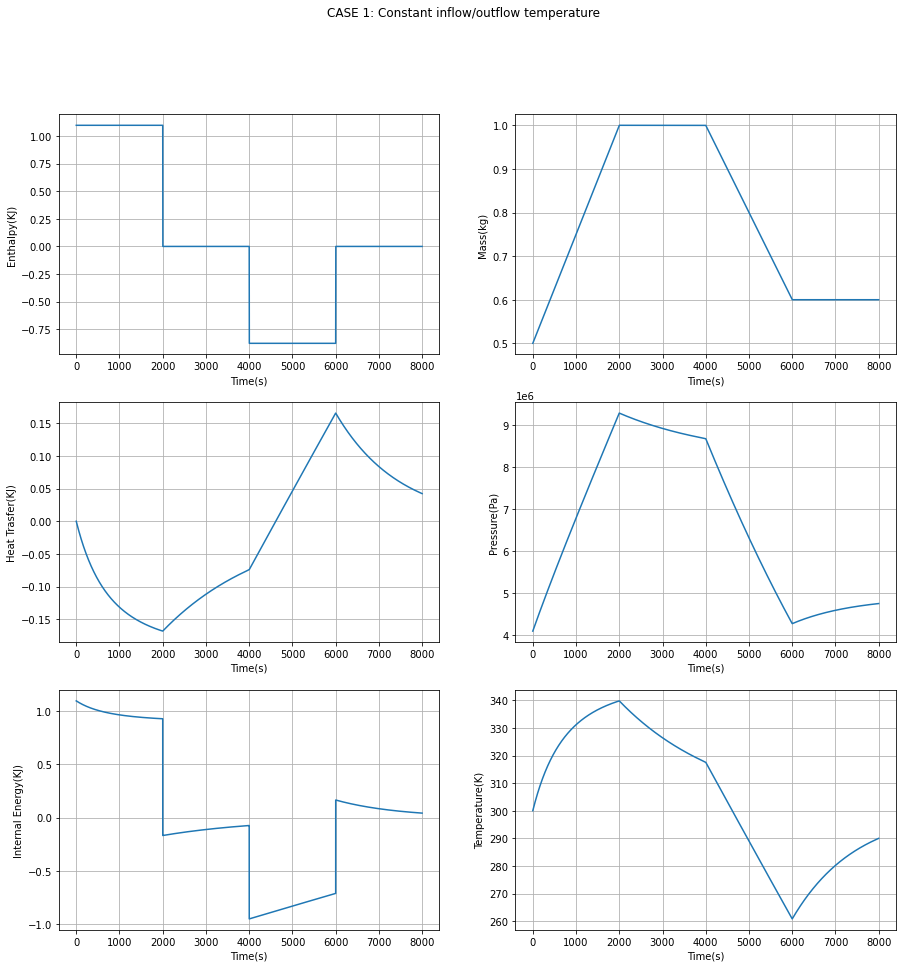

In [4]:
Label = 'CASE 1: Constant inflow/outflow temperature'
plots(H['H1'], Q['Q1'], U['U1'], m, P['P1'], T['T1'], Label)

## Plotting for 2nd case

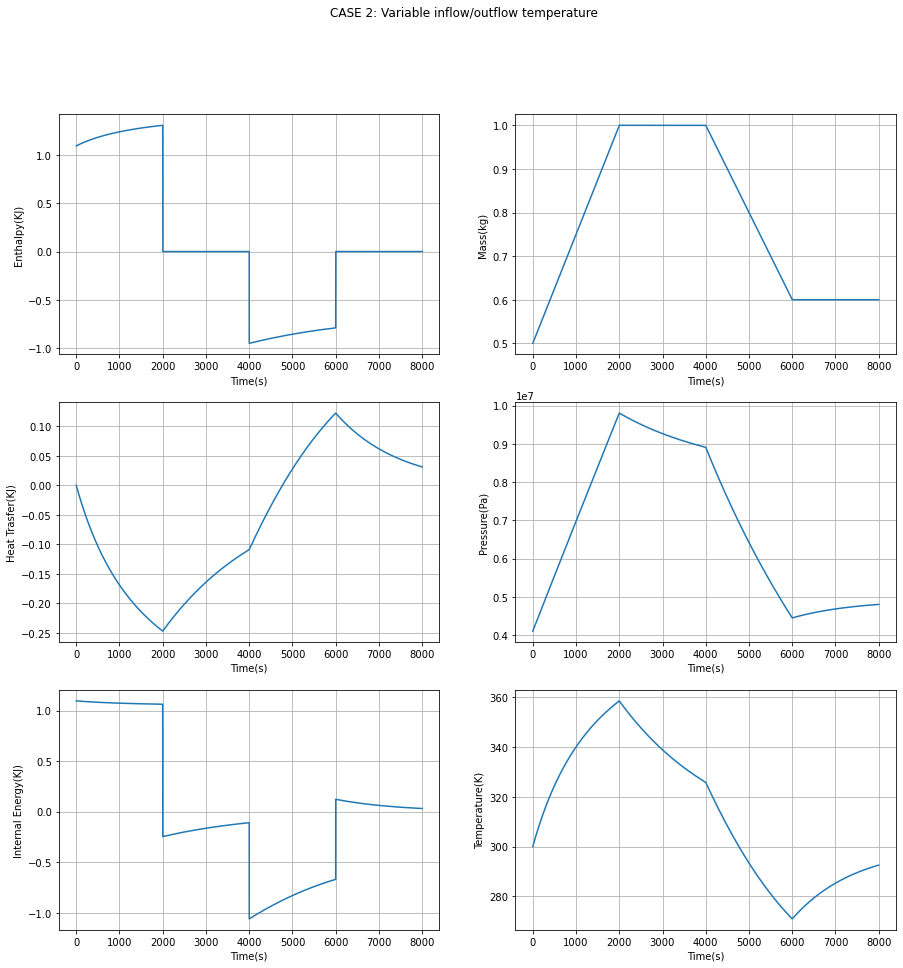

In [5]:
Label = 'CASE 2: Variable inflow/outflow temperature'
plots(H['H2'], Q['Q2'], U['U2'], m, P['P2'], T['T2'], Label)

## Plotting for 3rd case

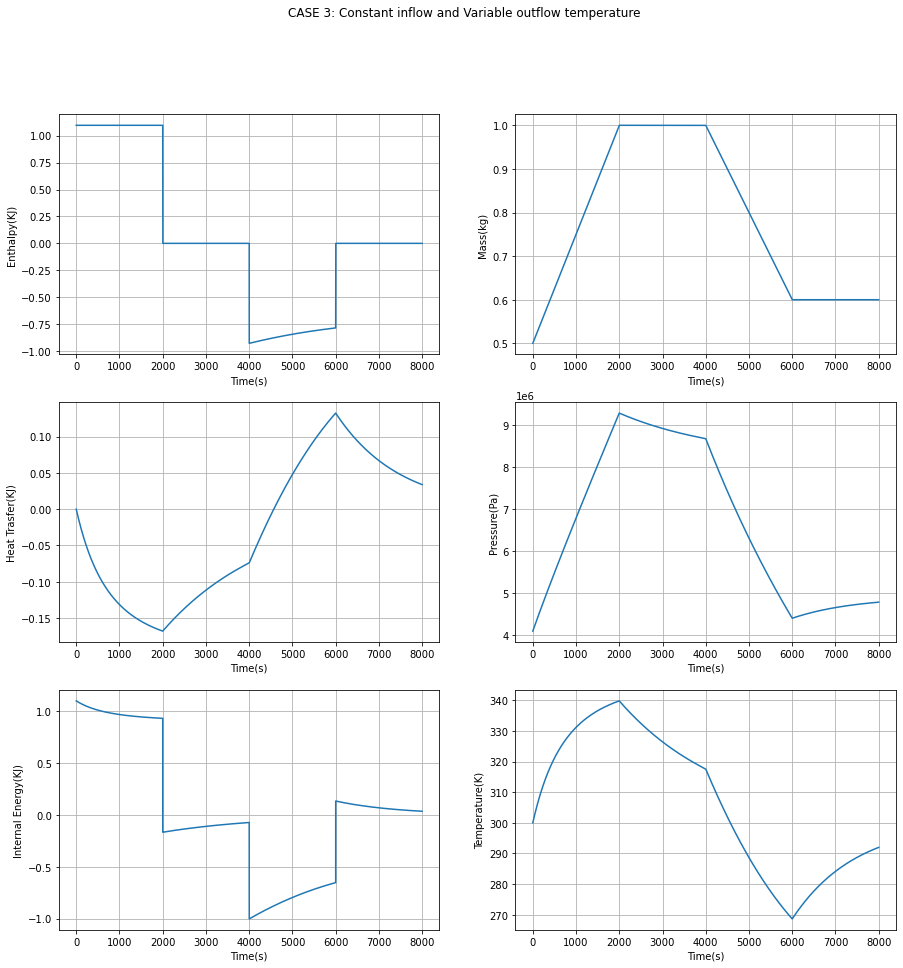

In [6]:
Label = 'CASE 3: Constant inflow and Variable outflow temperature'
plots(H['H3'], Q['Q3'], U['U3'], m, P['P3'], T['T3'], Label)

## Fitted results by two-parameter formula compared
## with data from three-parameter formula under three filling
## times

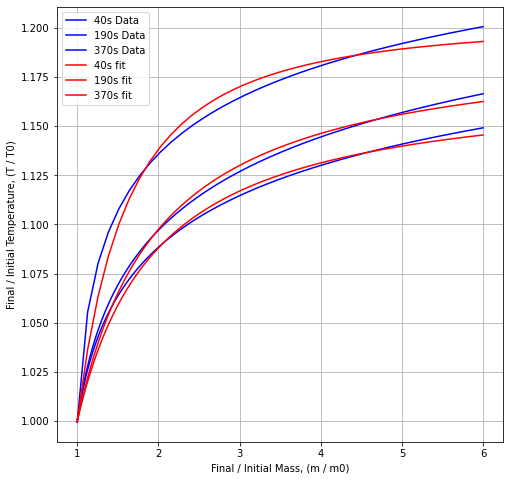

In [7]:
Tn = {'T1':[], 'T2':[], 'T3':[]}
Tnn = {'T1':[], 'T2':[],'T3':[]}
def K(n):  # K returns the ratio of m/m_0
    return np.linspace(1, 6, n)

for t in range(370):
    if t < 40:
        A, B, C = -35.17, 36.16, 0.04595
        Tn['T1'].append((A + B * (K(40)[t])**0.5)**C)
        A, C = 1.204, 1.631
        Tnn['T1'].append(A - (A - 1) * (K(40)[t])**-C)
        
    if t< 190:
        A, B, C = -9.504, 10.50, 0.05526
        Tn['T2'].append((A + B * (K(190)[t])**0.5)**C)
        A, C = 1.195, 1.000
        Tnn['T2'].append(A - (A - 1) * (K(190)[t])**-C)
        
    if t< 370:
        A, B, C = -10.51, 11.50, 0.04841
        Tn['T3'].append((A + B * (K(370)[t])**0.5)**C)
        A, C = 1.173, 1.026
        Tnn['T3'].append(A - (A - 1) * (K(370)[t])**-C)
        
plt.figure(figsize=(8,8))      
plt.plot(K(40),Tn['T1'],'b-', label='40s Data')
plt.plot(K(190),Tn['T2'],'b-', label='190s Data')
plt.plot(K(370),Tn['T3'],'b-', label='370s Data')
plt.plot(K(40), Tnn['T1'],'r-', label='40s fit')
plt.plot(K(190), Tnn['T2'],'r-', label='190s fit')
plt.plot(K(370), Tnn['T3'],'r-', label='370s fit')
plt.xlabel('Final / Initial Mass, (m / m0)')
plt.ylabel('Final / Initial Temperature, (T / T0)')
plt.grid()
plt.legend();